<a href="https://colab.research.google.com/github/KayalvizhiT513/Sine-Interpolation/blob/main/Arc_cos_vs_Midpoint_in_sin_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

# Step 1: Generate 50 evenly spaced samples between 0 and 90 degrees
theta_deg = np.linspace(0, 90, 50)  # theta in degrees
theta_rad = np.radians(theta_deg)    # convert to radians
sin_values = np.sin(theta_rad)       # sine of theta

# Step 2: Iterate over consecutive sample pairs and compute the slope (m) and arccos(m)
for i in range(len(theta_rad) - 1):
    theta1 = theta_rad[i]
    theta2 = theta_rad[i + 1]

    sin1 = sin_values[i]
    sin2 = sin_values[i + 1]

    # Midpoint between theta1 and theta2
    midpoint_theta = (theta1 + theta2) / 2

    # Step 3: Compute slope between the sine values of consecutive samples
    m = (sin2 - sin1) / (theta2 - theta1)  # slope approximation between two points

    # Step 4: Find arccos(m), ensure m is in range (-1, 1) to avoid domain errors
    if -1 <= m <= 1:
        arccos_m = np.arccos(m)

        # Step 5: Determine if arccos(m) is left or right of the midpoint
        if arccos_m < midpoint_theta:
            position = "left"
        else:
            position = "right"

        # Convert angles to degrees for easier interpretation
        midpoint_theta_deg = np.degrees(midpoint_theta)
        arccos_m_deg = np.degrees(arccos_m)

        # Output the result
        print(f"Sample {i + 1}:")
        print(f"Theta1 = {np.degrees(theta1):.2f} deg, Theta2 = {np.degrees(theta2):.2f} deg")
        print(f"Midpoint Theta = {midpoint_theta_deg:.2f} deg, arccos(m) = {arccos_m_deg:.2f} deg")
        print(f"arccos(m) is to the {position} of the midpoint by {arccos_m_deg-midpoint_theta_deg}\n")
    else:
        print(f"Sample {i + 1}: m = {m:.2f} is out of range for arccos. Skipping this sample.\n")


Sample 1:
Theta1 = 0.00 deg, Theta2 = 1.84 deg
Midpoint Theta = 0.92 deg, arccos(m) = 1.06 deg
arccos(m) is to the right of the midpoint by 0.14205981421956593

Sample 2:
Theta1 = 1.84 deg, Theta2 = 3.67 deg
Midpoint Theta = 2.76 deg, arccos(m) = 2.81 deg
arccos(m) is to the right of the midpoint by 0.05051764070548925

Sample 3:
Theta1 = 3.67 deg, Theta2 = 5.51 deg
Midpoint Theta = 4.59 deg, arccos(m) = 4.62 deg
arccos(m) is to the right of the midpoint by 0.030445570109689513

Sample 4:
Theta1 = 5.51 deg, Theta2 = 7.35 deg
Midpoint Theta = 6.43 deg, arccos(m) = 6.45 deg
arccos(m) is to the right of the midpoint by 0.021737181919895043

Sample 5:
Theta1 = 7.35 deg, Theta2 = 9.18 deg
Midpoint Theta = 8.27 deg, arccos(m) = 8.28 deg
arccos(m) is to the right of the midpoint by 0.016871351855757055

Sample 6:
Theta1 = 9.18 deg, Theta2 = 11.02 deg
Midpoint Theta = 10.10 deg, arccos(m) = 10.12 deg
arccos(m) is to the right of the midpoint by 0.013760719024386248

Sample 7:
Theta1 = 11.02 de

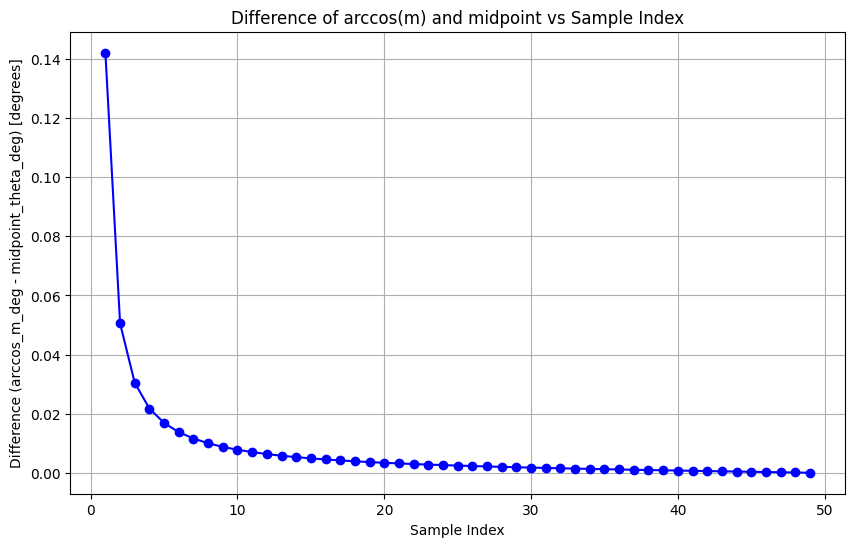

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate 50 evenly spaced samples between 0 and 90 degrees
theta_deg = np.linspace(0, 90, 50)  # theta in degrees
theta_rad = np.radians(theta_deg)    # convert to radians
sin_values = np.sin(theta_rad)       # sine of theta

# Initialize a list to store differences (arccos_m_deg - midpoint_theta_deg)
differences = []

# Step 2: Iterate over consecutive sample pairs and compute arccos_m_deg - midpoint_theta_deg
for i in range(len(theta_rad) - 1):
    theta1 = theta_rad[i]
    theta2 = theta_rad[i + 1]

    sin1 = sin_values[i]
    sin2 = sin_values[i + 1]

    # Midpoint between theta1 and theta2
    midpoint_theta = (theta1 + theta2) / 2

    # Step 3: Compute slope between the sine values of consecutive samples
    m = (sin2 - sin1) / (theta2 - theta1)  # slope approximation between two points

    # Step 4: Find arccos(m), ensure m is in range (-1, 1) to avoid domain errors
    if -1 <= m <= 1:
        arccos_m = np.arccos(m)

        # Convert angles to degrees for easier interpretation
        midpoint_theta_deg = np.degrees(midpoint_theta)
        arccos_m_deg = np.degrees(arccos_m)

        # Compute the difference and store it
        diff = arccos_m_deg - midpoint_theta_deg
        differences.append(diff)
    else:
        # Append NaN if m is out of range for arccos
        differences.append(np.nan)

# Step 5: Plot the differences against sample indices
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(differences) + 1), differences, marker='o', linestyle='-', color='b')
plt.title("Difference of arccos(m) and midpoint vs Sample Index")
plt.xlabel("Sample Index")
plt.ylabel("Difference (arccos_m_deg - midpoint_theta_deg) [degrees]")
plt.grid(True)
plt.show()
